# Análise de Dados do Estado do Paraná sobre Estelionato 2023 - 2024

## Análise Mensal dos Estelionatos eno Estado do Paraná Aponta Oscilações e a Urgência de Ações Preventivas

A avaliação dos casos de estelionato eno Estado do Paraná, entre janeiro de 2023 e setembro de 2024, identificou flutuações significativas, com períodos de aumento e diminuição acentuados. 

Em fevereiro de 2023, registrou-se uma queda de 1083 casos (-9,40%), seguida por um crescimento de 1662 casos (+15,92%) em março. 

Já, no ano de 2024, janeiro apresentou um aumento de 1054 casos (+8,61%), mas os meses seguintes foram marcados por grandes variações, incluindo uma drástica redução de 2614 casos (-20,67%) em setembro. 

Essas oscilações reforçam a necessidade de políticas públicas eficazes e ações rápidas para estabilizar e reduzir a ocorrência de estelionatos. É de suma imortância o monitoramento constante e medidas preventivas para enfrentar esse crime e proteger a população.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
estelionato_23 = pd.read_excel(r"C:\Users\brunn\OneDrive\Área de Trabalho\Folha de Londrina\Estelionato\estelionato_23.xlsx")

In [6]:
estelionato_24 = pd.read_excel(r"C:\Users\brunn\OneDrive\Área de Trabalho\Folha de Londrina\Estelionato\estelionato.24.xlsx")

In [7]:
estelionato_23.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2023,1,1,0,0,CURITIBA,OUTROS
1,2023,1,1,0,0,CURITIBA,OUTROS
2,2023,1,1,0,0,CURITIBA,OUTROS
3,2023,1,1,0,0,CURITIBA,ATIVIDADE FINANCEIRA
4,2023,1,1,0,0,CURITIBA,OUTROS


In [8]:
estelionato_24.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2024,1,1,1,0,CURITIBA,OUTROS
1,2024,1,1,1,0,CURITIBA,OUTROS
2,2024,1,1,1,0,CURITIBA,OUTROS
3,2024,1,1,1,0,CURITIBA,OUTROS
4,2024,1,1,1,0,CURITIBA,OUTROS


In [9]:
# Analisar Estruturas do dataset
estelionato_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139226 entries, 0 to 139225
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Ano            139226 non-null  int64 
 1   Mês            139226 non-null  int64 
 2   Dia            139226 non-null  int64 
 3   Dia da Semana  139226 non-null  int64 
 4   Hora           139226 non-null  int64 
 5   Município      139226 non-null  object
 6   Ambiente       139226 non-null  object
dtypes: int64(5), object(2)
memory usage: 7.4+ MB


In [10]:
# Analisar Estruturas do dataset
estelionato_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112668 entries, 0 to 112667
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Ano            112668 non-null  int64 
 1   Mês            112668 non-null  int64 
 2   Dia            112668 non-null  int64 
 3   Dia da Semana  112668 non-null  int64 
 4   Hora           112668 non-null  int64 
 5   Município      112668 non-null  object
 6   Ambiente       112668 non-null  object
dtypes: int64(5), object(2)
memory usage: 6.0+ MB


In [11]:
# Checar os nomes das colunas
estelionato_23.columns

Index(['Ano', 'Mês', 'Dia', 'Dia da Semana', 'Hora', 'Município', 'Ambiente'], dtype='object')

In [12]:
# Checar os nomes das colunas
estelionato_24.columns

Index(['Ano', 'Mês', 'Dia', 'Dia da Semana', 'Hora', 'Município', 'Ambiente'], dtype='object')

In [13]:
# Verificar valores únicos da coluna - 2023
print(estelionato_23['Dia da Semana'].unique())

[0 1 2 3 4 5 6]


In [14]:
# Verificar valores únicos da coluna - 2024
print(estelionato_24['Dia da Semana'].unique())

[1 2 3 4 5 6 0]


In [15]:
# Substituir os valores da coluna (Dia da Semana )- alterar o número por nome - 2023

estelionato_23['Dia da Semana'].replace({2:'segunda', 3:'terça', 4:'quarta', 5:'quinta', 6:'sexta', 0:'sábado', 1:'domingo'}, inplace=True)

C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\3024659447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  estelionato_23['Dia da Semana'].replace({2:'segunda', 3:'terça', 4:'quarta', 5:'quinta', 6:'sexta', 0:'sábado', 1:'domingo'}, inplace=True)


In [16]:
estelionato_23.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2023,1,1,sábado,0,CURITIBA,OUTROS
1,2023,1,1,sábado,0,CURITIBA,OUTROS
2,2023,1,1,sábado,0,CURITIBA,OUTROS
3,2023,1,1,sábado,0,CURITIBA,ATIVIDADE FINANCEIRA
4,2023,1,1,sábado,0,CURITIBA,OUTROS


In [17]:
# Substituir os valores da coluna (Dia da Semana )- alterar o número por nome - 2024

estelionato_24['Dia da Semana'].replace({2:'segunda', 3:'terça', 4:'quarta', 5:'quinta', 6:'sexta', 0:'sábado', 1:'domingo'}, inplace=True)

C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\146136098.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  estelionato_24['Dia da Semana'].replace({2:'segunda', 3:'terça', 4:'quarta', 5:'quinta', 6:'sexta', 0:'sábado', 1:'domingo'}, inplace=True)


In [18]:
estelionato_24.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2024,1,1,domingo,0,CURITIBA,OUTROS
1,2024,1,1,domingo,0,CURITIBA,OUTROS
2,2024,1,1,domingo,0,CURITIBA,OUTROS
3,2024,1,1,domingo,0,CURITIBA,OUTROS
4,2024,1,1,domingo,0,CURITIBA,OUTROS


In [19]:
# Substituir os valores da coluna Mês - alterar o numero por nome
estelionato_23['Mês'].replace({1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}, inplace=True)

C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\1645753503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  estelionato_23['Mês'].replace({1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}, inplace=True)


In [20]:
estelionato_23.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2023,Janeiro,1,sábado,0,CURITIBA,OUTROS
1,2023,Janeiro,1,sábado,0,CURITIBA,OUTROS
2,2023,Janeiro,1,sábado,0,CURITIBA,OUTROS
3,2023,Janeiro,1,sábado,0,CURITIBA,ATIVIDADE FINANCEIRA
4,2023,Janeiro,1,sábado,0,CURITIBA,OUTROS


In [21]:
# Substituir os valores da coluna Mês - alterar o numero por nome
estelionato_24['Mês'].replace({1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}, inplace=True)

C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\2092311419.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  estelionato_24['Mês'].replace({1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}, inplace=True)


In [22]:
estelionato_24.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2024,Janeiro,1,domingo,0,CURITIBA,OUTROS
1,2024,Janeiro,1,domingo,0,CURITIBA,OUTROS
2,2024,Janeiro,1,domingo,0,CURITIBA,OUTROS
3,2024,Janeiro,1,domingo,0,CURITIBA,OUTROS
4,2024,Janeiro,1,domingo,0,CURITIBA,OUTROS


In [23]:
# Contagem de eventos por mês - 2023
cont_mensal_23 = estelionato_23.groupby(['Ano', 'Mês']).size().reset_index(name='quantidade')

print("Contagem de Eventos Mensais:")
print(cont_mensal_23)

Contagem de Eventos Mensais:
     Ano        Mês  quantidade
0   2023      Abril       10026
1   2023     Agosto       12219
2   2023   Dezembro       12241
3   2023  Fevereiro       10437
4   2023    Janeiro       11520
5   2023      Julho       11299
6   2023      Junho       11203
7   2023       Maio       11873
8   2023      Março       12099
9   2023   Novembro       13181
10  2023    Outubro       11907
11  2023   Setembro       11221


In [24]:
# Contagem de eventos por mês - 2024
cont_mensal_24 = estelionato_24.groupby(['Ano', 'Mês']).size().reset_index(name='quantidade')

print("Contagem de Eventos Mensais:")
print(cont_mensal_24)

Contagem de Eventos Mensais:
    Ano        Mês  quantidade
0  2024      Abril       13175
1  2024     Agosto       12645
2  2024  Fevereiro       11915
3  2024    Janeiro       13295
4  2024      Julho       12743
5  2024      Junho       13019
6  2024       Maio       13036
7  2024      Março       12809
8  2024   Setembro       10031


In [25]:
#  Contagem de eventos por DIA - 2023
contagem_diaria_23 = estelionato_23['Dia da Semana'].value_counts().reset_index()
contagem_diaria_23.columns = ['Dia da Semana', 'quantidade']

# Exibir resultado
print("\nContagem de Eventos por Dia da Semana:")
print(contagem_diaria_23)


Contagem de Eventos por Dia da Semana:
  Dia da Semana  quantidade
0         terça       24819
1       segunda       24736
2        quarta       23976
3       domingo       23698
4        quinta       23218
5         sexta       11556
6        sábado        7223


In [26]:
 # Contagem de eventos por DIA - 2024
contagem_diaria_24 = estelionato_24['Dia da Semana'].value_counts().reset_index()
contagem_diaria_24.columns = ['Dia da Semana', 'quantidade']

# Exibir resultado
print("\nContagem de Eventos por Dia da Semana:")
print(contagem_diaria_24)


Contagem de Eventos por Dia da Semana:
  Dia da Semana  quantidade
0         terça       20275
1       domingo       19713
2        quarta       19603
3       segunda       19250
4        quinta       18910
5         sexta        9097
6        sábado        5820


# Gráficos de Eventos Mensais

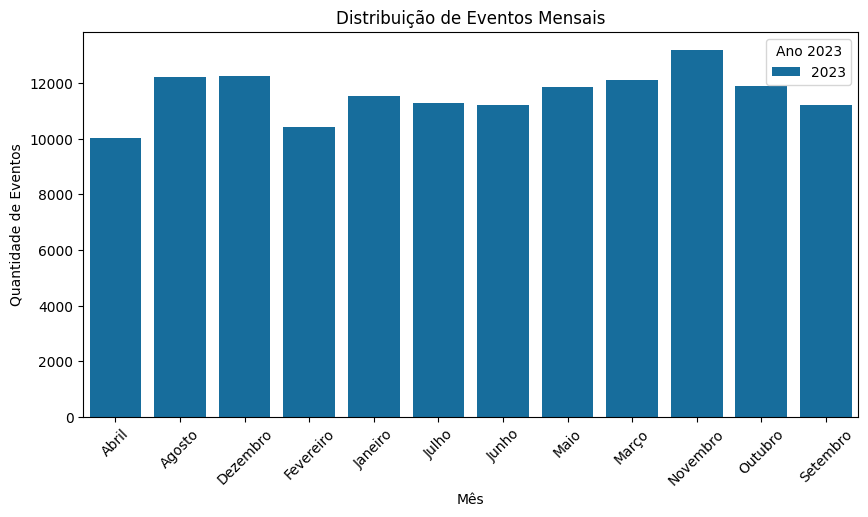

In [27]:
# Plotar gráfico de eventos MENSAIS - 2023

plt.figure(figsize=(10, 5))
sns.barplot(x='Mês', y='quantidade', hue='Ano', data=cont_mensal_23, palette='colorblind')
plt.title('Distribuição de Eventos Mensais')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Ano 2023')
plt.show()

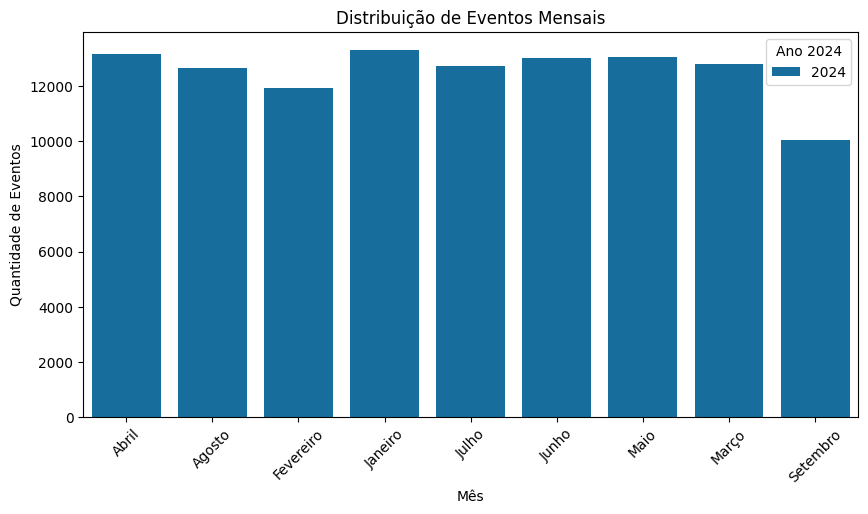

In [28]:
# Plotar gráfico de eventos MENSAIS -2024

plt.figure(figsize=(10, 5))
sns.barplot(x='Mês', y='quantidade', hue='Ano', data=cont_mensal_24, palette='colorblind')
plt.title('Distribuição de Eventos Mensais')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Ano 2024')
plt.show()

# Plotar Gráficos de eventos por Dia da Semana - 2023

plt.figure(figsize=(10, 5))
sns.barplot(x='Dia da Semana', y='quantidade', data=contagem_diaria_23, palette='colorblind')
plt.title('Distribuição de Eventos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Ano 2023')
plt.show()

C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\2503689830.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia da Semana', y='quantidade', data=contagem_diaria_24, palette='colorblind')
C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\2503689830.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Ano 2024')


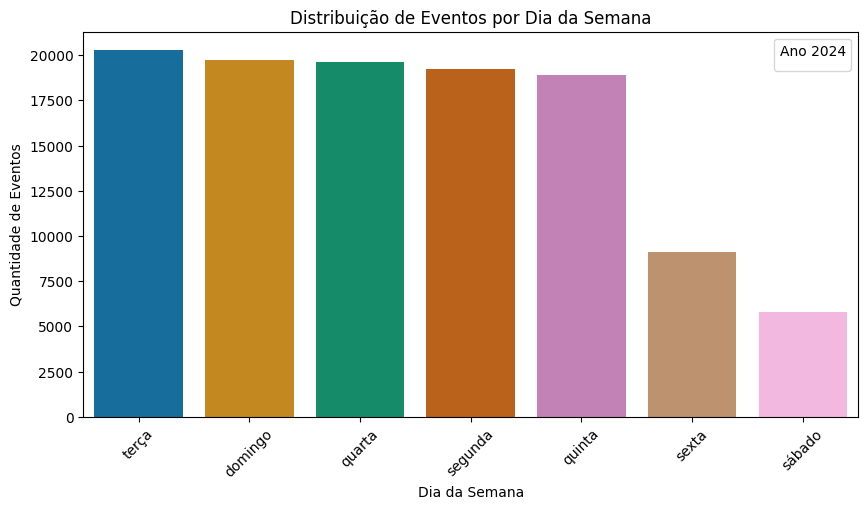

In [29]:
# Plotar Gráficos de eventos por Dia da Semana - 2023

plt.figure(figsize=(10, 5))
sns.barplot(x='Dia da Semana', y='quantidade', data=contagem_diaria_24, palette='colorblind')
plt.title('Distribuição de Eventos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Ano 2024')
plt.show()

C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\3012341579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia da Semana', y='quantidade', data=contagem_diaria_23, palette='colorblind')
C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\3012341579.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Ano 2023')


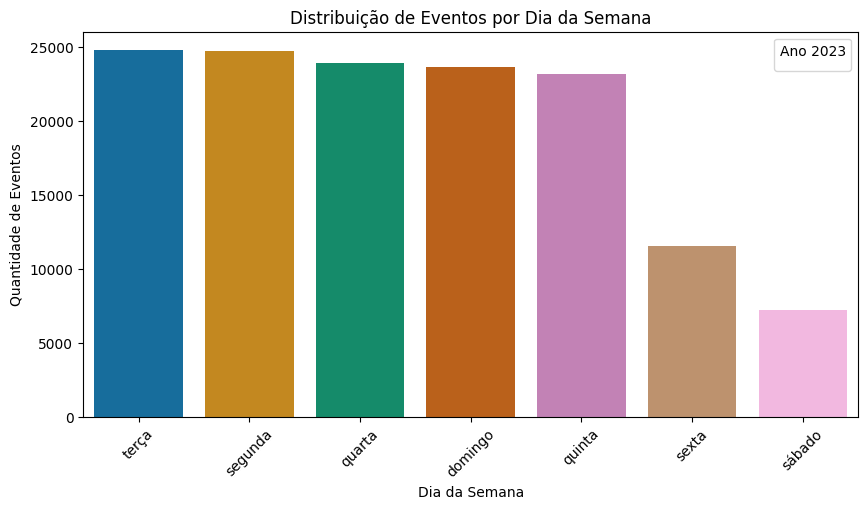

In [30]:
# Plotar Gráficos de eventos por Dia da Semana - 2023

plt.figure(figsize=(10, 5))
sns.barplot(x='Dia da Semana', y='quantidade', data=contagem_diaria_23, palette='colorblind')
plt.title('Distribuição de Eventos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Ano 2023')
plt.show()

# Contagem de Eventos por Horário

In [31]:
# Contar os eventos por HORÁRIO - 2023
contagem_hora_23 = estelionato_23['Hora'].value_counts().reset_index()
contagem_hora_23.columns = ['Hora', 'quantidade']

# Ordenar os resultados por horário
contagem_hora_23.sort_values('Hora', inplace=True)

# Exibir resultado
print("Contagem de Eventos por Horário:")
print(contagem_hora_23)

Contagem de Eventos por Horário:
    Hora  quantidade
13     0        3030
19     1         710
20     2         635
21     3         534
22     4         445
23     5         442
18     6         906
15     7        2088
8      8        8197
4      9       10982
0     10       17785
5     11       10936
1     12       12495
6     13       10250
2     14       11497
3     15       11340
7     16        9124
9     17        7815
10    18        6063
11    19        4564
12    20        3633
14    21        2571
16    22        1893
17    23        1291


In [32]:
# Contar os eventos por HORÁRIO - 2024
contagem_hora_24 = estelionato_24['Hora'].value_counts().reset_index()
contagem_hora_24.columns = ['Hora', 'quantidade']

# Ordenar os resultados por horário
contagem_hora_24.sort_values('Hora', inplace=True)

# Exibir resultado
print("Contagem de Eventos por Horário:")
print(contagem_hora_24)

Contagem de Eventos por Horário:
    Hora  quantidade
13     0        2731
21     1         570
20     2         743
19     3         773
22     4         478
23     5         389
18     6         851
15     7        1906
8      8        7370
5      9        8563
0     10       12552
4     11        8805
1     12        9963
6     13        8431
2     14        9208
3     15        8807
7     16        7430
9     17        6310
10    18        4914
11    19        3932
12    20        3040
14    21        2135
16    22        1705
17    23        1062


C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\815070133.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hora', y='quantidade', data=contagem_hora_23, palette='muted')  # Usei a paleta 'muted'


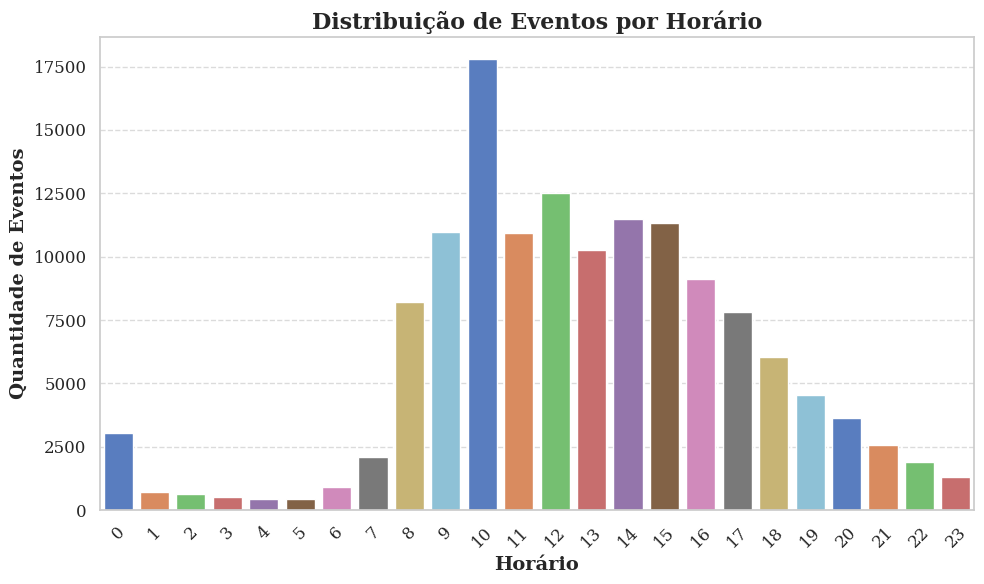

In [33]:
#  Gráfico de contagem de eventos por horário

# Ajustando o estilo do gráfico para algo mais sofisticado
sns.set(style="whitegrid")  # Use o estilo 'whitegrid' para um fundo claro com linhas de grade discretas

plt.figure(figsize=(10, 6))  # Aumentei um pouco a altura para equilibrar melhor os eixos
sns.barplot(x='Hora', y='quantidade', data=contagem_hora_23, palette='muted')  # Usei a paleta 'muted'

# Ajustando o título e os rótulos com fontes mais elegantes
plt.title('Distribuição de Eventos por Horário', fontsize=16, fontweight='bold', family='serif')  # Título com fontes mais sérias
plt.xlabel('Horário', fontsize=14, fontweight='bold', family='serif')  # Rótulo do eixo X
plt.ylabel('Quantidade de Eventos', fontsize=14, fontweight='bold', family='serif')  # Rótulo do eixo Y

# Ajustando as legendas
plt.xticks(rotation=45, fontsize=12, family='serif')  # Rótulos do eixo X
plt.yticks(fontsize=12, family='serif')  # Rótulos do eixo Y

# Modificando a grade para não interferir na leitura do gráfico
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Deixando a grade mais suave (apenas no eixo Y)

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\67029011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hora', y='quantidade', data=contagem_hora_24, palette='muted')  # Usei a paleta 'muted'


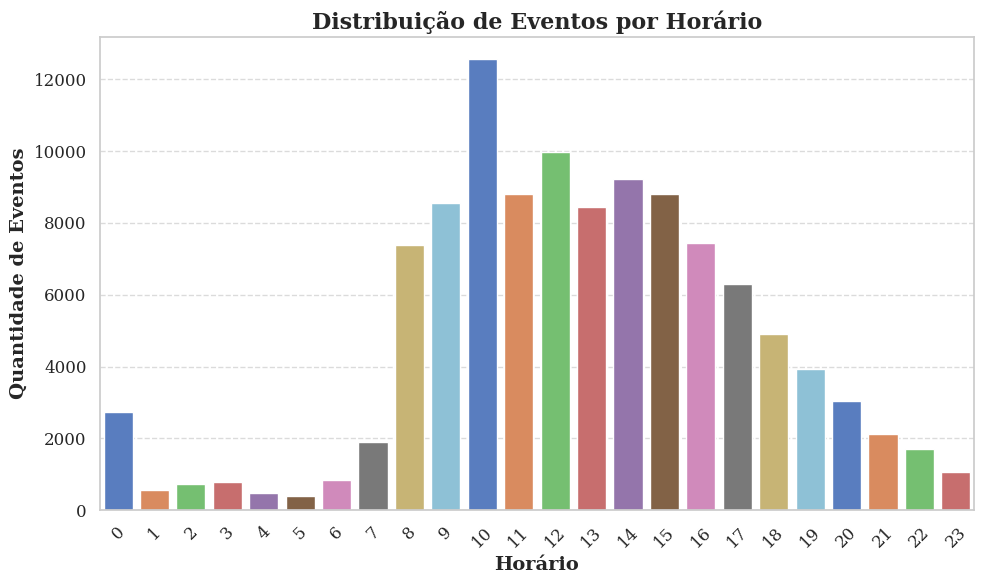

In [34]:
#  Gráfico de contagem de eventos por horário

# Ajustando o estilo do gráfico para algo mais sofisticado
sns.set(style="whitegrid")  # Use o estilo 'whitegrid' para um fundo claro com linhas de grade discretas

plt.figure(figsize=(10, 6))  # Aumentei um pouco a altura para equilibrar melhor os eixos
sns.barplot(x='Hora', y='quantidade', data=contagem_hora_24, palette='muted')  # Usei a paleta 'muted'

# Ajustando o título e os rótulos com fontes mais elegantes
plt.title('Distribuição de Eventos por Horário', fontsize=16, fontweight='bold', family='serif')  # Título com fontes mais sérias
plt.xlabel('Horário', fontsize=14, fontweight='bold', family='serif')  # Rótulo do eixo X
plt.ylabel('Quantidade de Eventos', fontsize=14, fontweight='bold', family='serif')  # Rótulo do eixo Y

# Ajustando as legendas
plt.xticks(rotation=45, fontsize=12, family='serif')  # Rótulos do eixo X
plt.yticks(fontsize=12, family='serif')  # Rótulos do eixo Y

# Modificando a grade para não interferir na leitura do gráfico
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Deixando a grade mais suave (apenas no eixo Y)

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Concatenar os Bancos de dados para Análises Comparativas

In [35]:
# Adicionar coluna para identificar o ano
estelionato_23['Ano'] = 2023
estelionato_24['Ano'] = 2024

# Concatenar os datasets
estelionato_completo = pd.concat([estelionato_23, estelionato_24])

# Verificar as primeiras linhas do dataset combinado
print(estelionato_completo.head())

    Ano      Mês  Dia Dia da Semana  Hora Município              Ambiente
0  2023  Janeiro    1        sábado     0  CURITIBA                OUTROS
1  2023  Janeiro    1        sábado     0  CURITIBA                OUTROS
2  2023  Janeiro    1        sábado     0  CURITIBA                OUTROS
3  2023  Janeiro    1        sábado     0  CURITIBA  ATIVIDADE FINANCEIRA
4  2023  Janeiro    1        sábado     0  CURITIBA                OUTROS


# Comparar a Quantidade de Estelionato por Ano

In [36]:
 # Contagem total de estelionatos por ano
contagem_ano = estelionato_completo.groupby('Ano').size()
print(contagem_ano)

Ano
2023    139226
2024    112668
dtype: int64


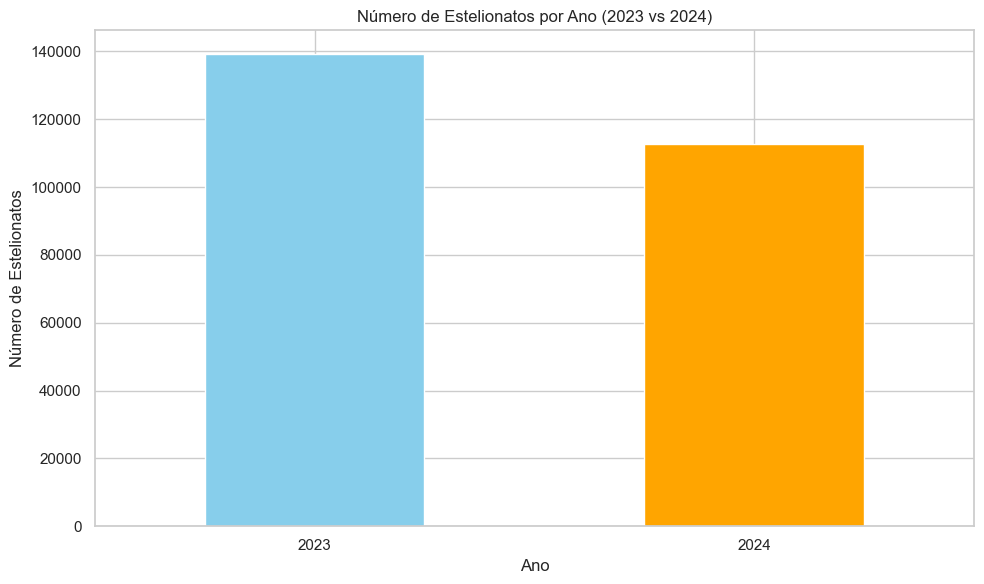

In [37]:
# Plotar quantidade 
contagem_ano.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

plt.title('Número de Estelionatos por Ano (2023 vs 2024)')
plt.xlabel('Ano')
plt.ylabel('Número de Estelionatos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Análise de Tendências Mensais

In [38]:
# Contagem mensal por ano
contagem_mensal_2 = estelionato_completo.groupby(['Ano', 'Mês']).size().reset_index(name='quantidade')


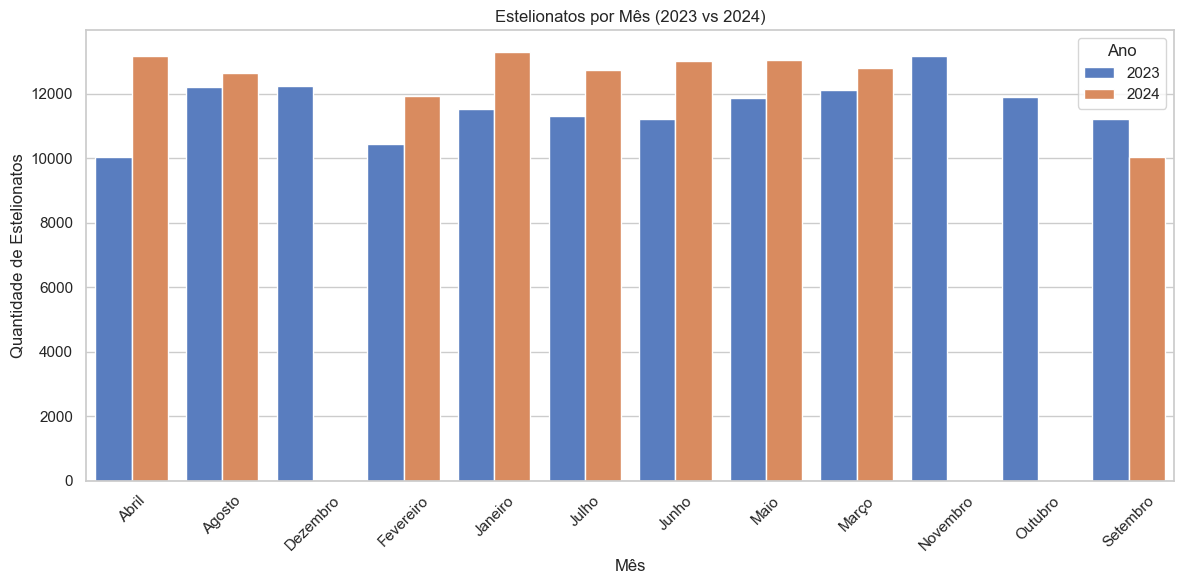

In [39]:
# Plotar Análise de Tendência Mensal
plt.figure(figsize=(12, 6))
sns.barplot(x='Mês', y='quantidade', hue='Ano', data=contagem_mensal_2, palette='muted')
plt.title('Estelionatos por Mês (2023 vs 2024)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Estelionatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise de Estelionatos por Dia da Semana

In [40]:
# Contagem por Dia da Semana para cada ano
contagem_dia_semana_2 = estelionato_completo.groupby(['Ano', 'Dia da Semana']).size().reset_index(name='quantidade')

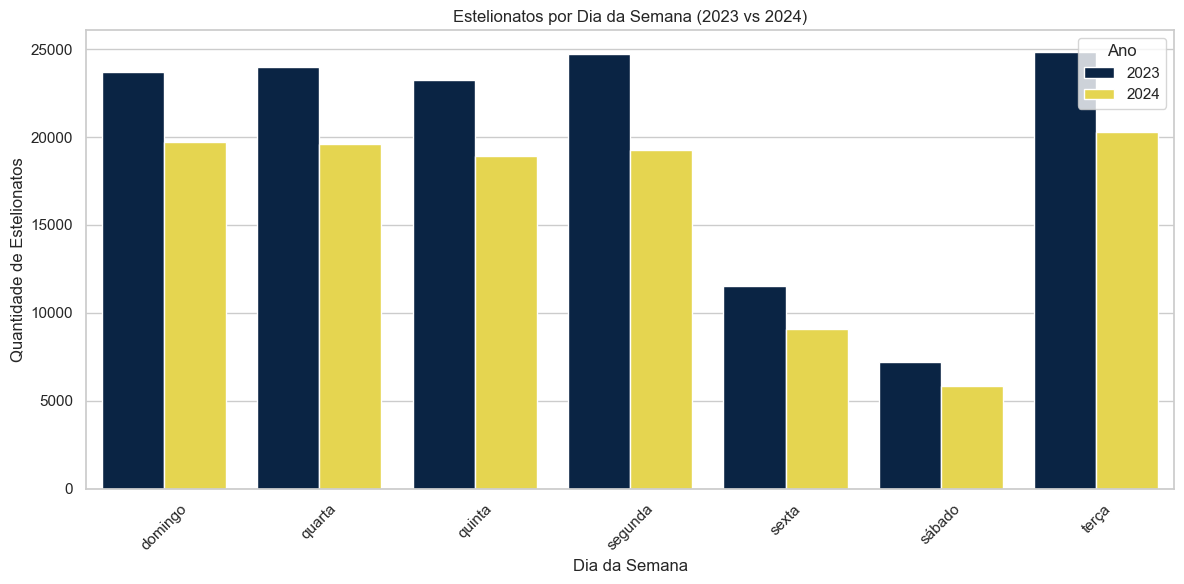

In [41]:
# Gráfico de barras comparando os dias da semana
plt.figure(figsize=(12, 6))
sns.barplot(x='Dia da Semana', y='quantidade', hue='Ano', data=contagem_dia_semana_2, palette='cividis')
plt.title('Estelionatos por Dia da Semana (2023 vs 2024)')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Estelionatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise de Estelionatos por Hora

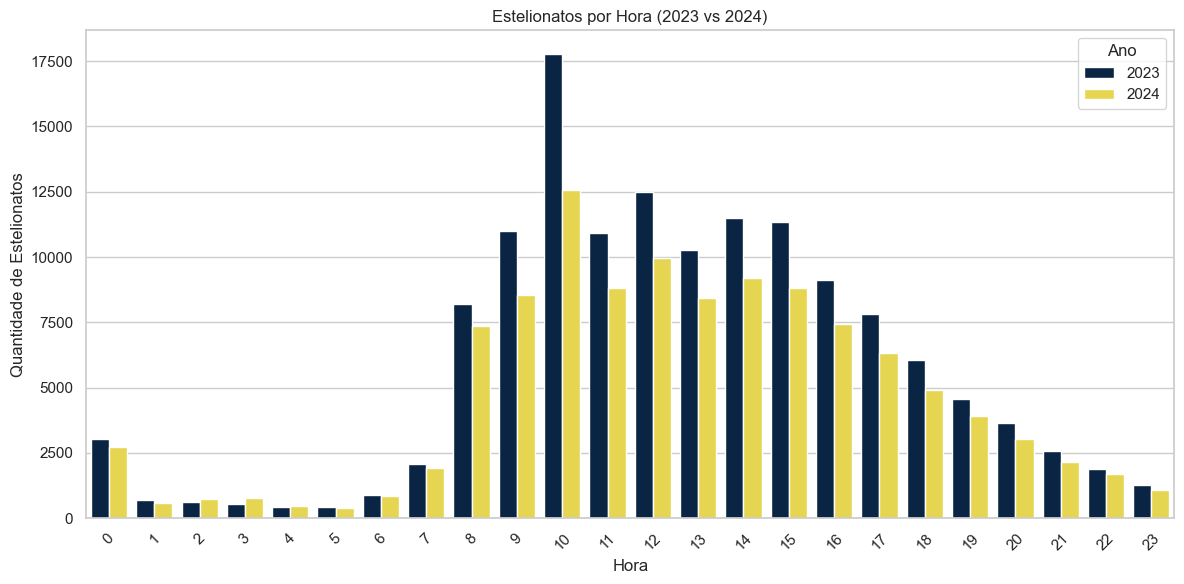

In [42]:
#  Contagem por Hora para cada ano
contagem_hora_2 = estelionato_completo.groupby(['Ano', 'Hora']).size().reset_index(name='quantidade')

# Gráfico de barras comparando as horas
plt.figure(figsize=(12, 6))
sns.barplot(x='Hora', y='quantidade', hue='Ano', data=contagem_hora_2, palette='cividis')
plt.title('Estelionatos por Hora (2023 vs 2024)')
plt.xlabel('Hora')
plt.ylabel('Quantidade de Estelionatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

      Ano             Município  quantidade
95   2023              CURITIBA       39027
495  2024              CURITIBA       29728
193  2023              LONDRINA        8710
211  2023               MARINGA        7200
593  2024              LONDRINA        6856
611  2024               MARINGA        5784
277  2023          PONTA GROSSA        5116
70   2023              CASCAVEL        5039
352  2023  SAO JOSE DOS PINHAIS        4975
677  2024          PONTA GROSSA        4764


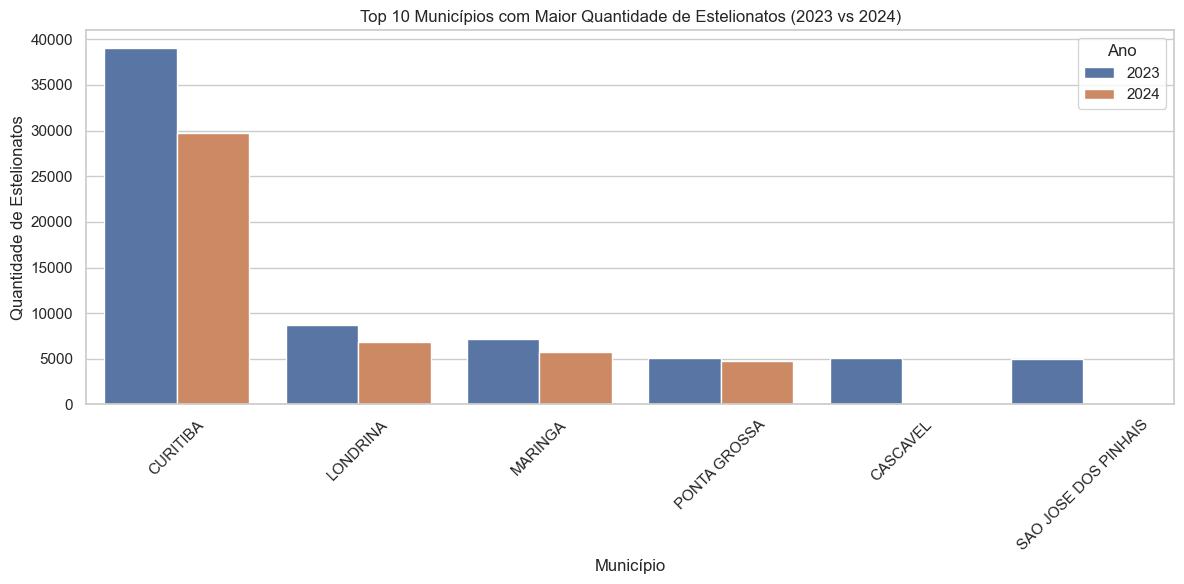

In [43]:
# Contagem por Município e Ano
contagem_municipio = estelionato_completo.groupby(['Ano', 'Município']).size().reset_index(name='quantidade')

# Exibe o top 10 municípios com maior quantidade de estelionatos
top_municipios = contagem_municipio.sort_values(by='quantidade', ascending=False).head(10)
print(top_municipios)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Município', y='quantidade', hue='Ano', data=top_municipios, palette='deep')
plt.title('Top 10 Municípios com Maior Quantidade de Estelionatos (2023 vs 2024)')
plt.xlabel('Município')
plt.ylabel('Quantidade de Estelionatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
# Contagem total de estelionatos por ano
contagem_ano = estelionato_completo.groupby('Ano').size()

# Verificar os valores totais de estelionatos em 2023 e 2024
total_2023 = contagem_ano[2023]
total_2024 = contagem_ano[2024]

print(f"Total de estelionatos em 2023: {total_2023}")
print(f"Total de estelionatos em 2024: {total_2024}")


Total de estelionatos em 2023: 139226
Total de estelionatos em 2024: 112668


In [45]:
# Calcular a variação percentual
variacao_percentual = ((total_2024 - total_2023) / total_2023) * 100

# Exibir o resultado
if variacao_percentual > 0:
    print(f"Houve um aumento de {variacao_percentual:.2f}% no número de estelionatos de 2023 para 2024.")
else:
    print(f"Houve uma diminuição de {abs(variacao_percentual):.2f}% no número de estelionatos de 2023 para 2024.")


Houve uma diminuição de 19.08% no número de estelionatos de 2023 para 2024.


# Previsão de Tendências

In [46]:
estelionato_23.columns

Index(['Ano', 'Mês', 'Dia', 'Dia da Semana', 'Hora', 'Município', 'Ambiente'], dtype='object')

In [47]:
# Verifique os valores únicos de Ano, Mês e Dia
print(estelionato_23['Ano'].unique())  # Verificar os valores únicos do ano
print(estelionato_23['Mês'].unique())  # Verificar os valores únicos do mês
print(estelionato_23['Dia'].unique())  # Verificar os valores únicos do dia


[2023]
['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [48]:
# Mapeamento dos meses em português para números
meses_map = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}


In [49]:
# Substituir os nomes dos meses pelos números
estelionato_23['Mês'] = estelionato_23['Mês'].replace(meses_map)

# Verifique se a substituição foi feita corretamente
print(estelionato_23[['Mês']].head())


   Mês
0    1
1    1
2    1
3    1
4    1


C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\1779569374.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  estelionato_23['Mês'] = estelionato_23['Mês'].replace(meses_map)


In [50]:
estelionato_23.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2023,1,1,sábado,0,CURITIBA,OUTROS
1,2023,1,1,sábado,0,CURITIBA,OUTROS
2,2023,1,1,sábado,0,CURITIBA,OUTROS
3,2023,1,1,sábado,0,CURITIBA,ATIVIDADE FINANCEIRA
4,2023,1,1,sábado,0,CURITIBA,OUTROS


In [51]:
# Verificar se há valores ausentes nas colunas 'Ano', 'Mês', 'Dia'
print(estelionato_23[['Ano', 'Mês', 'Dia']].isna().sum())


Ano    0
Mês    0
Dia    0
dtype: int64


In [52]:
# Verificar o tipo de dados das colunas 'Ano', 'Mês', 'Dia'
print(estelionato_23[['Ano', 'Mês', 'Dia']].dtypes)


Ano    int64
Mês    int64
Dia    int64
dtype: object


In [53]:
# Supondo que os nomes das colunas estejam errados, por exemplo:
estelionato_23.rename(columns={'Ano': 'year', 'Mês': 'month', 'Dia': 'day'}, inplace=True)


In [54]:
estelionato_23.head()


,year,month,day,Dia da Semana,Hora,Município,Ambiente
0,2023,1,1,sábado,0,CURITIBA,OUTROS
1,2023,1,1,sábado,0,CURITIBA,OUTROS
2,2023,1,1,sábado,0,CURITIBA,OUTROS
3,2023,1,1,sábado,0,CURITIBA,ATIVIDADE FINANCEIRA
4,2023,1,1,sábado,0,CURITIBA,OUTROS


In [55]:
# Criar DataFrame 
estelionato_23 = pd.DataFrame(estelionato_23) 

# Criar a coluna 'Data' combinando 'year', 'month' e 'day' 
estelionato_23['Data'] = pd.to_datetime(estelionato_23[['year', 'month', 'day']], errors='coerce') 

# Verificar a nova coluna 'Data'
print(estelionato_23[['year', 'month', 'day', 'Data']].head())

   year  month  day       Data
0  2023      1    1 2023-01-01
1  2023      1    1 2023-01-01
2  2023      1    1 2023-01-01
3  2023      1    1 2023-01-01
4  2023      1    1 2023-01-01


In [56]:
# Agrupar por Mês e Ano e contar os casos
dados_mensal = estelionato_23.groupby(estelionato_23['Data'].dt.to_period('M')).size().reset_index(name='Quantidade de Casos')

# Visualizar o resultado
print(dados_mensal.head())


      Data  Quantidade de Casos
0  2023-01                11520
1  2023-02                10437
2  2023-03                12099
3  2023-04                10026
4  2023-05                11873


# Visualização de Tendência

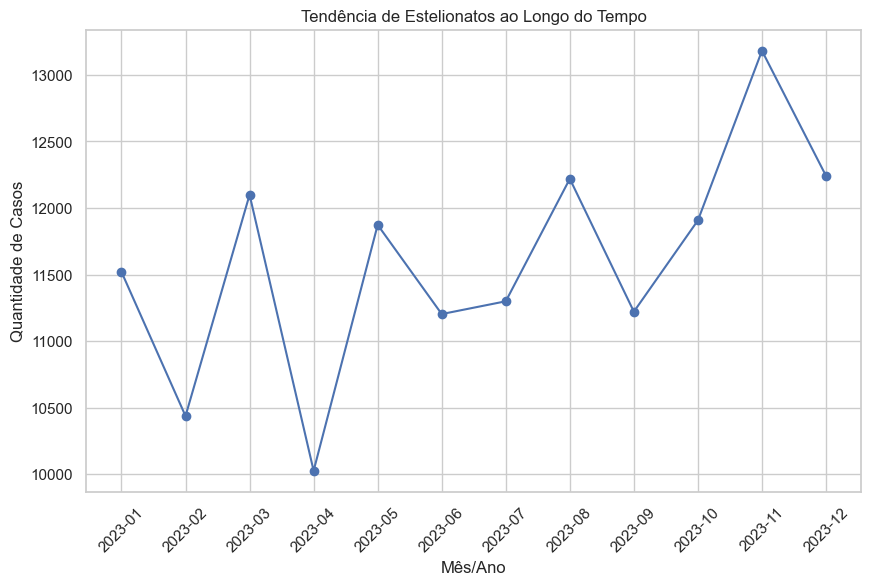

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(dados_mensal['Data'].astype(str), dados_mensal['Quantidade de Casos'], marker='o')
plt.title('Tendência de Estelionatos ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 2024 

In [58]:
# Substituir os nomes dos meses pelos números
estelionato_24['Mês'] = estelionato_24['Mês'].replace(meses_map)

# Verifique se a substituição foi feita corretamente
print(estelionato_24[['Mês']].head())


   Mês
0    1
1    1
2    1
3    1
4    1


C:\Users\brunn\AppData\Local\Temp\ipykernel_17036\2753928809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  estelionato_24['Mês'] = estelionato_24['Mês'].replace(meses_map)


In [59]:
estelionato_24.head()

,Ano,Mês,Dia,Dia da Semana,Hora,Município,Ambiente
0,2024,1,1,domingo,0,CURITIBA,OUTROS
1,2024,1,1,domingo,0,CURITIBA,OUTROS
2,2024,1,1,domingo,0,CURITIBA,OUTROS
3,2024,1,1,domingo,0,CURITIBA,OUTROS
4,2024,1,1,domingo,0,CURITIBA,OUTROS


In [60]:
 # Supondo que os nomes das colunas estejam errados, por exemplo:
estelionato_24.rename(columns={'Ano': 'year', 'Mês': 'month', 'Dia': 'day'}, inplace=True)

In [61]:
# Criar DataFrame 
estelionato_24 = pd.DataFrame(estelionato_24) 

# Criar a coluna 'Data' combinando 'year', 'month' e 'day' 
estelionato_24['Data'] = pd.to_datetime(estelionato_24[['year', 'month', 'day']], errors='coerce') 

# Verificar a nova coluna 'Data'
print(estelionato_24[['year', 'month', 'day', 'Data']].head())

   year  month  day       Data
0  2024      1    1 2024-01-01
1  2024      1    1 2024-01-01
2  2024      1    1 2024-01-01
3  2024      1    1 2024-01-01
4  2024      1    1 2024-01-01


In [62]:
# Agrupar por Mês e Ano e contar os casos
dados_mensal_2 = estelionato_24.groupby(estelionato_24['Data'].dt.to_period('M')).size().reset_index(name='Quantidade de Casos')

# Visualizar o resultado
print(dados_mensal.head())


      Data  Quantidade de Casos
0  2023-01                11520
1  2023-02                10437
2  2023-03                12099
3  2023-04                10026
4  2023-05                11873


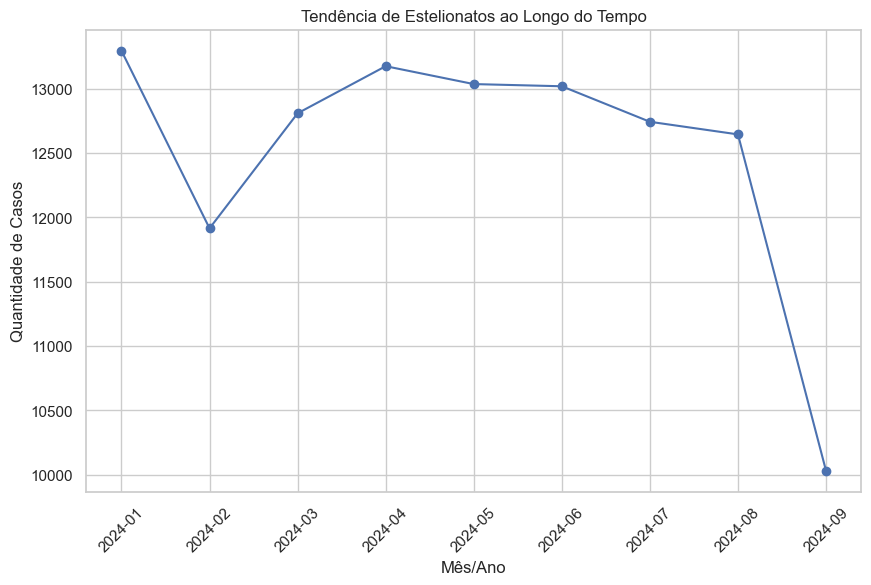

In [63]:
# VIsualização de Tendência
plt.figure(figsize=(10, 6))
plt.plot(dados_mensal_2['Data'].astype(str), dados_mensal_2['Quantidade de Casos'], marker='o')
plt.title('Tendência de Estelionatos ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [65]:
# Combinar os DataFrames
dados_combinados = pd.concat([estelionato_23, estelionato_24])

# Verificar os dados combinados
print(dados_combinados[['year', 'month', 'day', 'Data']].head())


   year  month  day       Data
0  2023      1    1 2023-01-01
1  2023      1    1 2023-01-01
2  2023      1    1 2023-01-01
3  2023      1    1 2023-01-01
4  2023      1    1 2023-01-01


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [71]:
estelionato_23.head()

,year,month,day,Dia da Semana,Hora,Município,Ambiente,Data
0,2023,1,1,sábado,0,CURITIBA,OUTROS,2023-01-01
1,2023,1,1,sábado,0,CURITIBA,OUTROS,2023-01-01
2,2023,1,1,sábado,0,CURITIBA,OUTROS,2023-01-01
3,2023,1,1,sábado,0,CURITIBA,ATIVIDADE FINANCEIRA,2023-01-01
4,2023,1,1,sábado,0,CURITIBA,OUTROS,2023-01-01


In [72]:
# Agrupar por Mês e Ano e contar os casos
dados_mensal_2 = dados_combinados.groupby(dados_combinados['Data'].dt.to_period('M')).size().reset_index(name='Quantidade')

# Converter a coluna 'Data' para timestamp
dados_mensal_2['Data'] = dados_mensal_2['Data'].dt.to_timestamp()

# Verificar o DataFrame resultante
print(dados_mensal_2.head())


        Data  Quantidade
0 2023-01-01       11520
1 2023-02-01       10437
2 2023-03-01       12099
3 2023-04-01       10026
4 2023-05-01       11873


In [73]:
# Converter para um índice de DataFrame
dados_mensal_2.set_index('Data', inplace=True)

# Verificar o DataFrame resultante
print(dados_mensal_2.head())


            Quantidade
Data                  
2023-01-01       11520
2023-02-01       10437
2023-03-01       12099
2023-04-01       10026
2023-05-01       11873


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


C:\Users\brunn\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


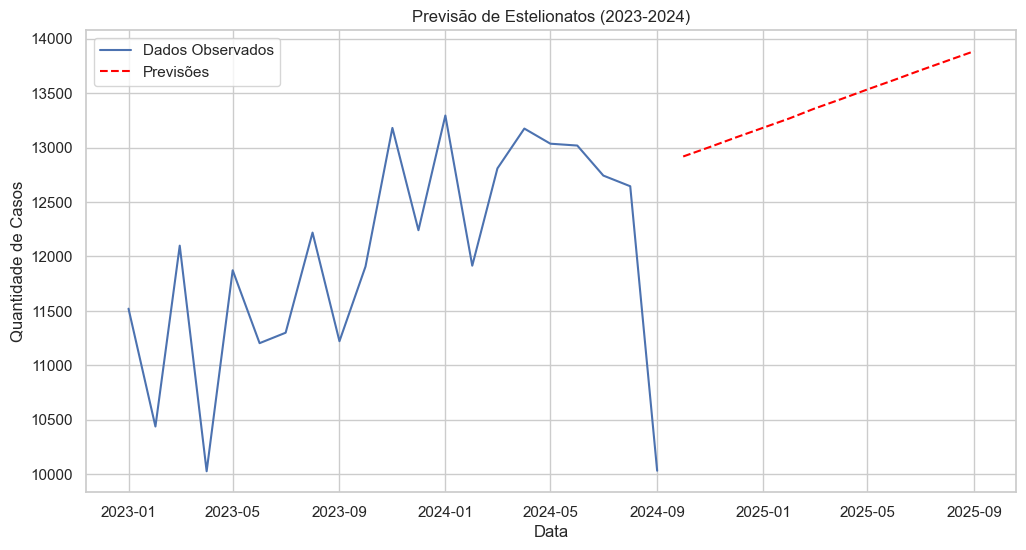

In [79]:
# Ajustar o modelo de Exponential Smoothing sem o componente sazonal
modelo = ExponentialSmoothing(dados_mensal_2['Quantidade'], trend='add').fit()

# Fazer previsões para os próximos 12 meses
previsoes = modelo.forecast(steps=12)

# Visualizar os dados históricos e previsões
plt.figure(figsize=(12, 6))
plt.plot(dados_mensal_2.index, dados_mensal_2['Quantidade'], label='Dados Observados')
plt.plot(previsoes.index, previsoes, label='Previsões', linestyle='--', color='red')
plt.title('Previsão de Estelionatos (2023-2024)')
plt.xlabel('Data')
plt.ylabel('Quantidade de Casos')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# Calcular a variação absoluta e percentual em relação ao mês anterior 
dados_mensal_2['Variação Absoluta'] = dados_mensal_2['Quantidade'].diff() 
dados_mensal_2['Variação Percentual'] = dados_mensal_2['Quantidade'].pct_change() * 100

# Verificar o DataFrame resultante
print(dados_mensal_2) 

# Transformar para uma visualização adequada
print(dados_mensal_2.to_string(index=False))

            Quantidade  Variação Absoluta  Variação Percentual
Data                                                          
2023-01-01       11520                NaN                  NaN
2023-02-01       10437            -1083.0            -9.401042
2023-03-01       12099             1662.0            15.924116
2023-04-01       10026            -2073.0           -17.133647
2023-05-01       11873             1847.0            18.422103
2023-06-01       11203             -670.0            -5.643056
2023-07-01       11299               96.0             0.856913
2023-08-01       12219              920.0             8.142313
2023-09-01       11221             -998.0            -8.167608
2023-10-01       11907              686.0             6.113537
2023-11-01       13181             1274.0            10.699588
2023-12-01       12241             -940.0            -7.131477
2024-01-01       13295             1054.0             8.610408
2024-02-01       11915            -1380.0           -10

### Os casos observados de estelionato mostram uma tendência de aumento constante até meados de 2024, seguido por uma queda acentuada.

### Previsões Futuras (2024-2025): A partir de setembro de 2024, as previsões indicam um aumento contínuo nos casos de estelionato até setembro de 2025.

Este estudo revelou uma tendência preocupante no aumento desse tipo de crime. De acordo com os dados observados entre janeiro de 2023 e setembro de 2024, houve um aumento constante nos casos de estelionato, seguido por uma queda acentuada em meados de 2024. No entanto, as previsões indicam que o número de casos voltará a subir, com um aumento contínuo esperado até setembro de 2025.

O gráfico de previsão mostra que, apesar da queda temporária, a linha de tendência para os próximos meses sugere que o número de estelionatos pode ultrapassar a marca de 13.000 casos. Esse aumento contínuo é um sinal de alerta para as autoridades locais e a população, destacando a necessidade urgente de medidas preventivas e campanhas de conscientização para combater esse tipo de crime.

Especialistas recomendam que a população esteja atenta a possíveis fraudes e golpes, e que busquem orientação das autoridades em casos suspeitos. Além disso, é crucial que as políticas públicas sejam fortalecidas para lidar com o crescimento previsto nos estelionatos, visando a proteção dos cidadãos e a manutenção da ordem pública."

### Conclusão:
O estudo serve como um importante alerta para a sociedade e as autoridades, indicando a necessidade de ações imediatas para prevenir o aumento dos casos de estelionato na região. A previsão de crescimento contínuo até 2025 deve ser levada a sério, e medidas preventivas devem ser implementadas para proteger a população contra esse tipo de crime.